# Visualize contam db membership with a sankey diagram

In [1]:
library(dplyr)
library(readr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("..")

In [3]:
# define taxonomic levels to visualize out to
agglom_cols <- c("Superkingdom", "Phylum", "Class", "Order", "Family")

In [4]:
# read contam db taxonomic lineage CSV from OSF
taxonomy_csv <- read_csv("https://osf.io/jpdte/download") 

Rows: 4515 Columns: 8
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (8): ident, superkingdom, phylum, class, order, family, genus, species

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# how big is the database?
nrow(taxonomy_csv)

[1] 4515

In [6]:
# remove *__ from beginning of taxonomy name
taxonomy_csv2 <- taxonomy_csv %>%
  mutate(superkingdom = gsub("d__", "", superkingdom),
         phylum = gsub("p__", "", phylum),
         class = gsub("c__", "", class),
         order = gsub("o__", "", order),
         family = gsub("f__", "", family),
         genus = gsub("g__", "", genus), 
         species = gsub("s__", "", species)) %>%
  select(ident, Superkingdom = superkingdom, Phylum = phylum, Class = class, 
         Order = order, Family = family, Genus = genus, Species = species)

In [7]:
# format taxonomic CSV to prep for sankey diagram
taxonomy_csv2 <- taxonomy_csv2 %>%
  mutate(weight = 1) %>%
  select(-ident) %>%
  dplyr::group_by_at(dplyr::vars(tidyselect::all_of(agglom_cols))) %>%
  dplyr::summarize(sum_weight = sum(.data$weight)) %>%
  tidyr::drop_na()

`summarise()` has grouped output by 'Superkingdom', 'Phylum', 'Class', 'Order'. You can override using the `.groups` argument.


In [8]:
# format data for sankey plot
data <- ggforce::gather_set_data(taxonomy_csv2, 1:length(agglom_cols))

In [9]:
# create and ramp up palette
palette <- c('#5088C5', '#F28360', '#3B9886', '#F7B846', '#9977DA', '#F898AE')
palette <- grDevices::colorRampPalette(palette)(length(unique(data$y)))
# reshuffle vector
set.seed(1)
palette <- sample(palette)

In [10]:
sankey_plt <- ggplot2::ggplot(data, ggplot2::aes(x = .data$x, id = .data$id, split = .data$y, value = .data$sum_weight)) +
  ggforce::geom_parallel_sets(alpha = 0.3, axis.width = 0.1) +
  ggforce::geom_parallel_sets_axes(axis.width = 0.2, ggplot2::aes(fill = .data$y)) +
  ggforce::geom_parallel_sets_labels(colour = 'black', angle = 360, size = 2, hjust = -0.25, fontface = "italic") +
  ggplot2::theme_classic() +
  ggplot2::theme(axis.line.y = ggplot2::element_blank(),
                 axis.text.y = ggplot2::element_blank(),
                 axis.ticks.y = ggplot2::element_blank(),
                 axis.ticks.x = ggplot2::element_blank(),
                 axis.title.x = ggplot2::element_text(margin = margin(t = 9, r = 0, b = 0, l = 0)),
                 legend.position = "None") +
  ggplot2::labs(x = "Taxonomic Rank") +
  # buffer the last axis so full names have space to print to viz
  ggplot2::scale_x_continuous(labels = c(agglom_cols, ""),
                              breaks = 1:(length(agglom_cols) + 1),
                              limits = c(.75, length(agglom_cols) + 1)) +
  scale_y_continuous(limits = c(0, 25000), expand = c(0, 350)) +
  ggplot2::scale_fill_manual(values = palette)

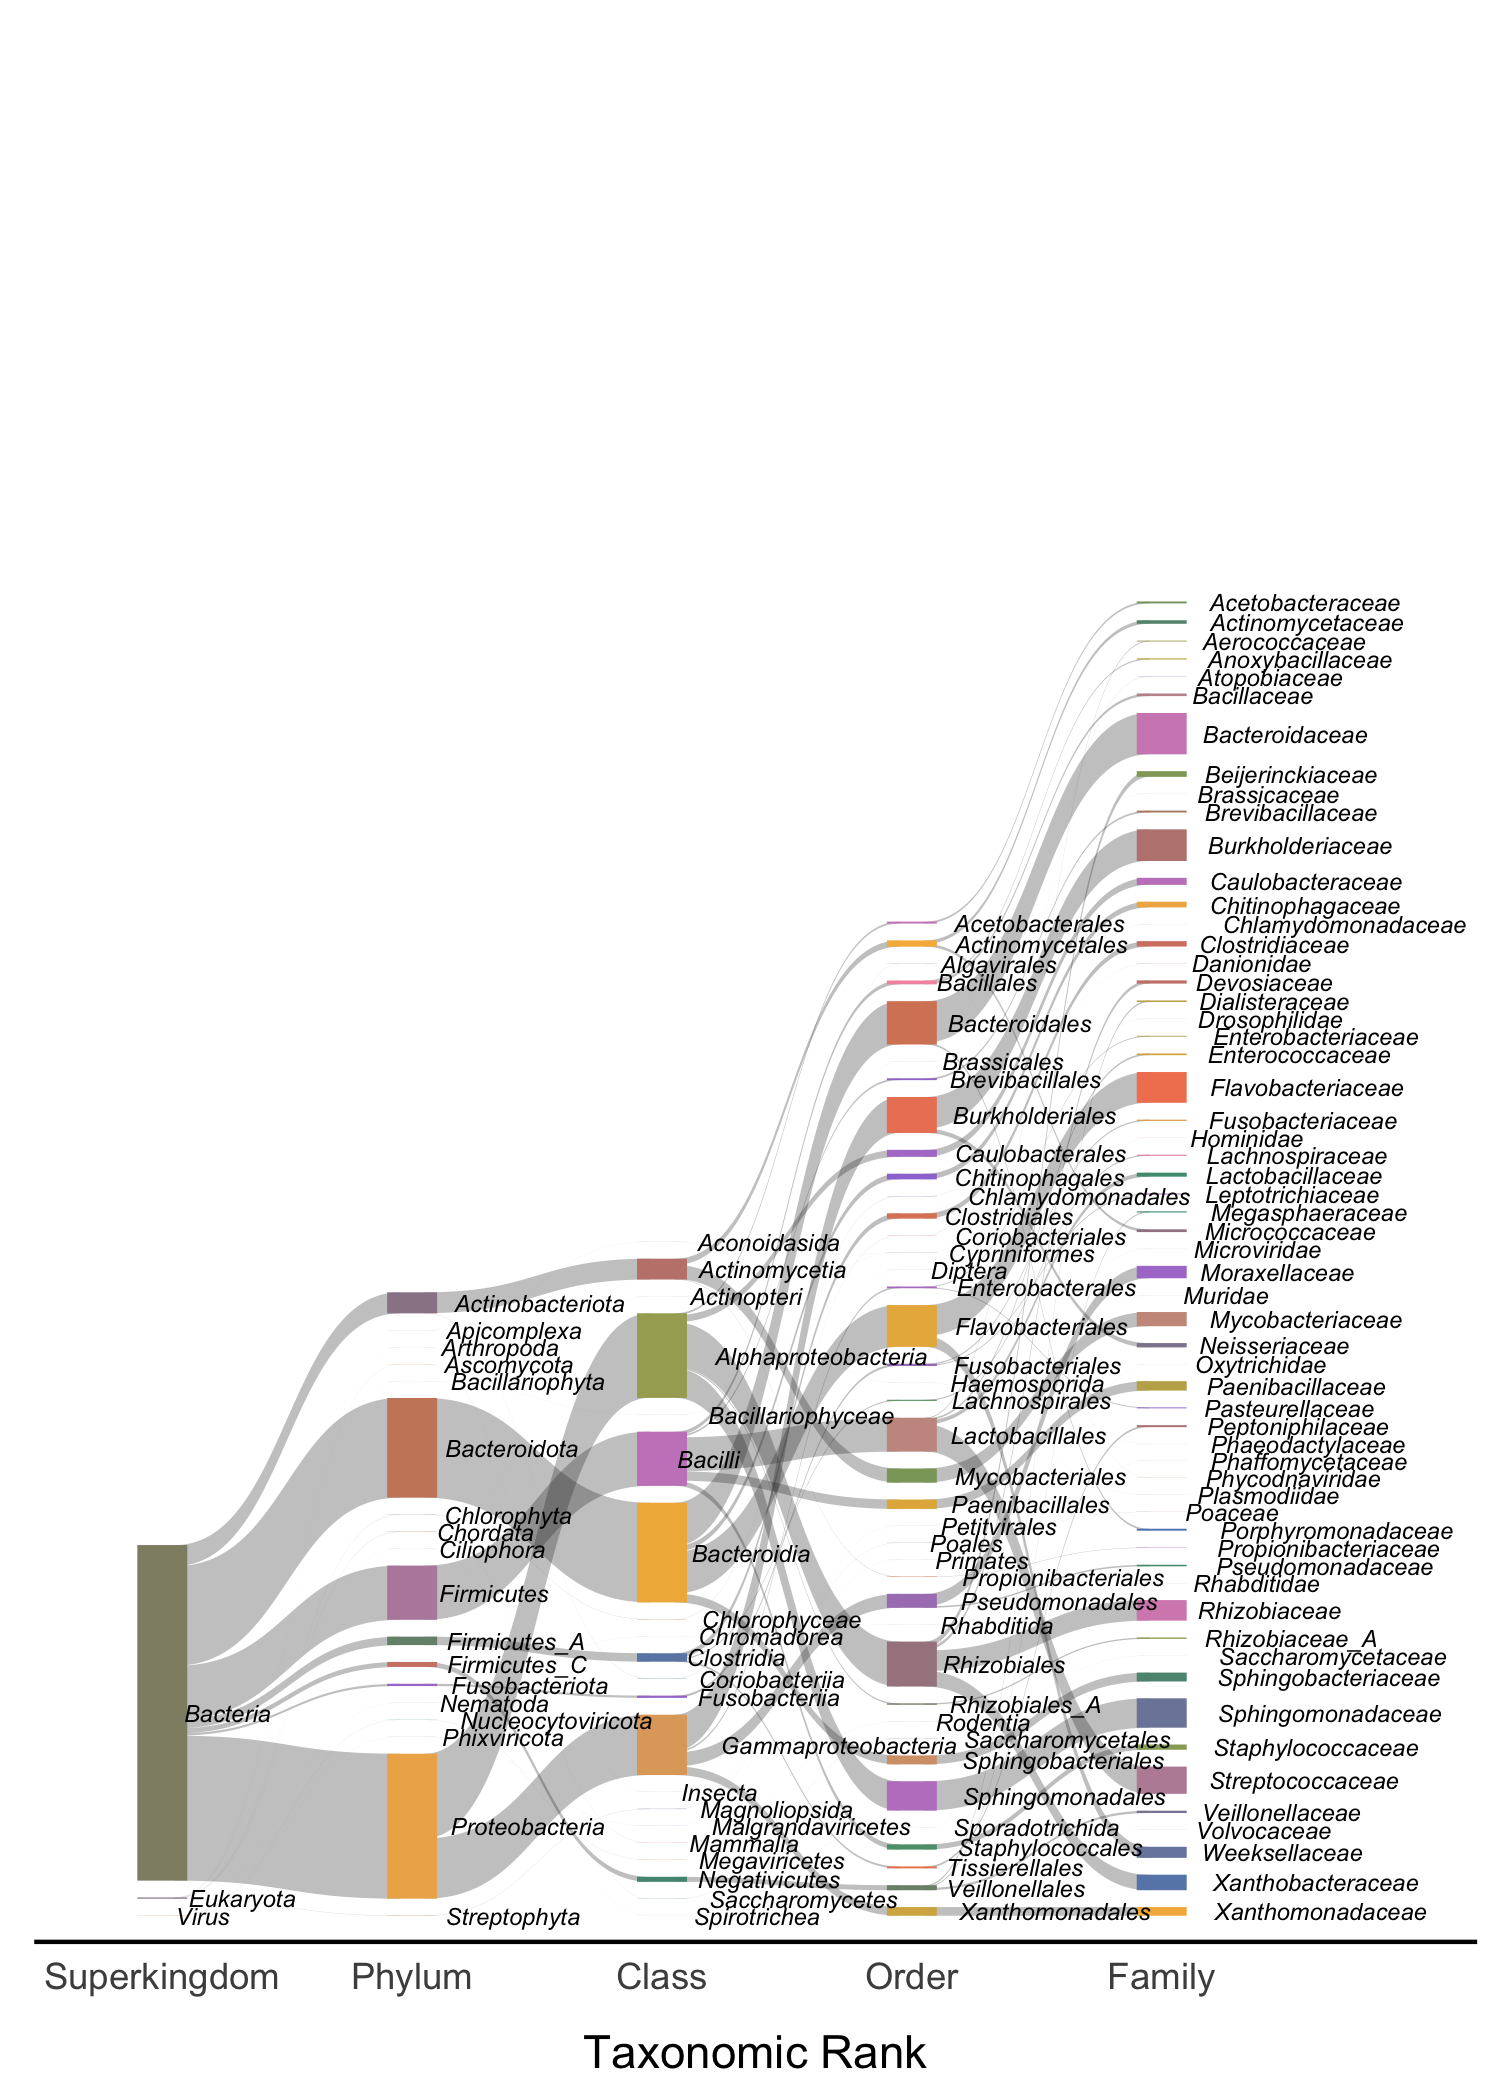

In [12]:
# adjust plot size rendered inline
options(repr.plot.width = 5, repr.plot.height = 7, repr.plot.res = 300)

sankey_plt

In [16]:
pdf("figures/fig2_db.pdf", width = 5, height = 7)
sankey_plt
dev.off()
png("figures/fig2_db.png", width = 5, height = 7, units = "in", res = 300)
sankey_plt
dev.off()
svg("figures/fig2_db.svg", width = 5, height = 7)
sankey_plt
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

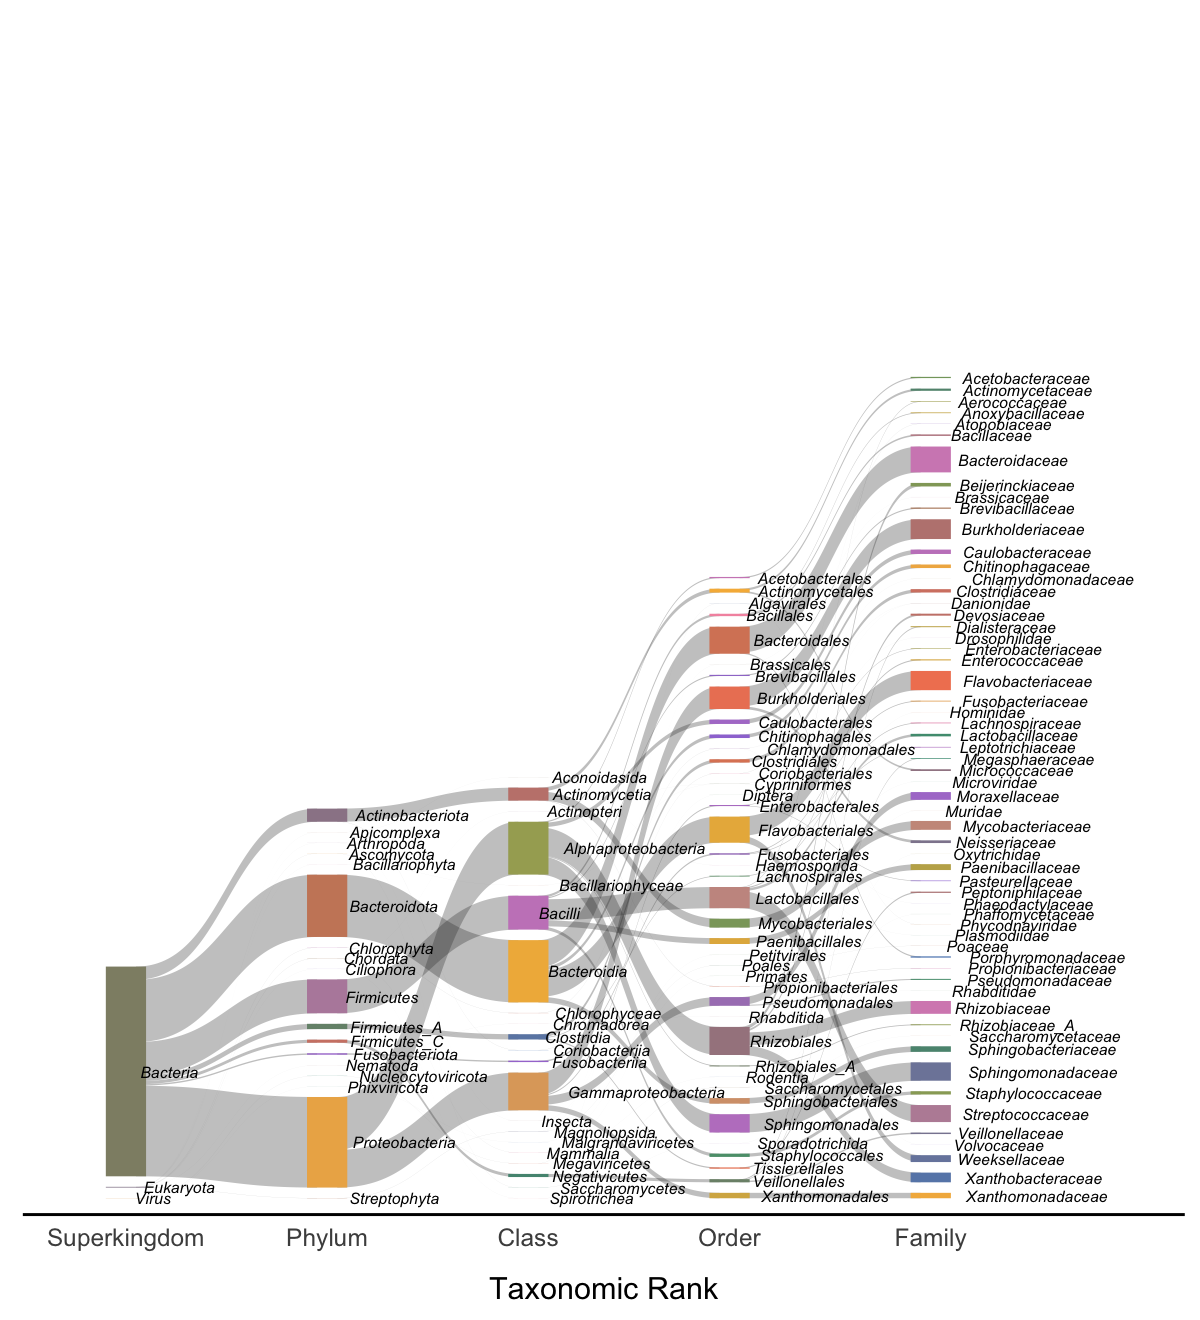

In [14]:
# miniture-ize to show on github...I know this isn't viewable
options(repr.plot.width = 6, repr.plot.height = 6.6, repr.plot.res = 200)

sankey_plt

In [15]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur/Monterey 10.16

Matrix products: default
BLAS/LAPACK: /Users/taylorreiter/miniconda3/envs/pltenv/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.4.0 readr_2.1.3   dplyr_1.0.10 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.10      pillar_1.8.1     compiler_4.1.3   base64enc_0.1-3 
 [5] tools_4.1.3      bit_4.0.5        digest_0.6.31    uuid_1.1-0      
 [9] jsonlite_1.8.4   evaluate_0.20    lifecycle_1.0.3  tibble_3.1.8    
[13] gtable_0.3.1     pkgconfig_2.0.3  rlang_1.0.6      IRdisplay_1.1   
[17] cli_3.6.0        curl_5.0.0       parallel_4.1.3   IRkernel_1.3.1  
[21] fastmap_1.1.0    withr_2.5.0      repr_1.1.5       generics_0.1.3  
[25] vctrs_0.5.2      hms_1.1.2        bi